In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('basic_income_dataset_dalia.csv')

In [4]:
df.head()

,country_code,uuid,age,gender,rural,dem_education_level,dem_full_time_job,dem_has_children,question_bbi_2016wave4_basicincome_awareness,question_bbi_2016wave4_basicincome_vote,question_bbi_2016wave4_basicincome_effect,question_bbi_2016wave4_basicincome_argumentsfor,question_bbi_2016wave4_basicincome_argumentsagainst,age_group,weight
0,AT,f6e7ee00-deac-0133-4de8-0a81e8b09a82,61,male,rural,no,no,no,I know something about it,I would not vote,None of the above,None of the above,None of the above,40_65,1.105.534.474
1,AT,54f0f1c0-dda1-0133-a559-0a81e8b09a82,57,male,urban,high,yes,yes,I understand it fully,I would probably vote for it,A basic income would not affect my work choices,It increases appreciation for household work a...,It might encourage people to stop working,40_65,1.533.248.826
2,AT,83127080-da3d-0133-c74f-0a81e8b09a82,32,male,urban,NaN,no,no,I have heard just a little about it,I would not vote,‰Û_ gain additional skills,It creates more equality of opportunity,Foreigners might come to my country and take a...,26_39,0.977591916
3,AT,15626d40-db13-0133-ea5c-0a81e8b09a82,45,male,rural,high,yes,yes,I have heard just a little about it,I would probably vote for it,‰Û_ work less,It reduces anxiety about financing basic needs,None of the above,40_65,1.105.534.474
4,AT,24954a70-db98-0133-4a64-0a81e8b09a82,41,female,urban,high,yes,yes,I have heard just a little about it,I would probably vote for it,None of the above,It reduces anxiety about financing basic needs,It is impossible to finance | It might encoura...,40_65,58.731.136


In [5]:
df['question_bbi_2016wave4_basicincome_vote'].unique()

array(['I would not vote', 'I would probably vote for it',
       'I would vote against it', 'I would vote for it',
       'I would probably vote against it'], dtype=object)

In [6]:
# make new column with vote or not for it

def vote_or_no(result):
    if result == 'I would probably vote for it':
        return 1
    elif result == 'I would vote for it':
        return 1
    else:
        return 0

In [7]:
df['results'] = df['question_bbi_2016wave4_basicincome_vote'].apply(vote_or_no)

In [8]:
# remove rows where they would not vote

df = df[df['question_bbi_2016wave4_basicincome_vote'] != 'I would not vote']

In [9]:
df['results'].value_counts(normalize = True)

1    0.717432
0    0.282568
Name: results, dtype: float64

In [10]:
# average age of someone that would vote for basic income
df[df['results'] == 1]['age'].mean()

37.79280906255131

In [11]:
# average age of someone that would note vote for basic income
df[df['results'] == 0]['age'].mean()

38.997498957899126

#### Hypothesis Test
- Null Hypothesis: Average age of someone that would vote for basic income == average age of someone that would not vote for basic income
- Alternative Hypothesis: Average of some one that would vote for basic income != average of age someone that would not vote for basic income

In [13]:
import matplotlib.pyplot as plt

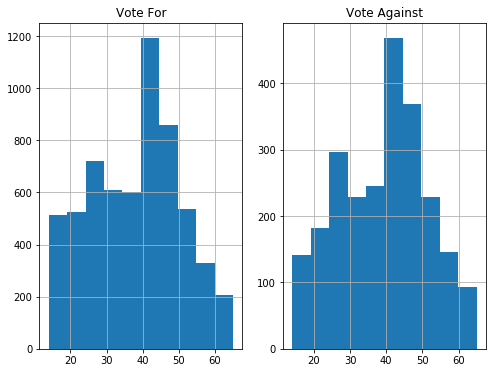

In [14]:
fig = plt.figure(figsize = (8, 6))

ax1 = plt.subplot(121)
df[df['results'] == 1]['age'].hist(ax = ax1)
ax1.set_title('Vote For')

ax2 = plt.subplot(122)
df[df['results'] == 0]['age'].hist(ax = ax2)
ax2.set_title('Vote Against')

plt.show()

In [15]:
# Find the average difference in age
original_diff = abs(df[df['results'] == 1]['age'].mean() - df[df['results'] == 0]['age'].mean())
original_diff

1.2046898953478191

In [19]:
df.shape[0] / 2

4245.0

In [17]:
# Split the data into 2 random samples and see what the difference.  Repeat this 10,000 times to see how often the 
# difference is greater than 1.2 (my original difference)

In [25]:
import numpy as np

In [27]:
%%time
my_diffs = []

for i in range(10000):
    sample_a = df['age'].sample(int(df.shape[0]/2))
    sample_b = df.drop(sample_a.index)['age']
    diff = abs(np.mean(sample_a) - np.mean(sample_b))
    my_diffs.append(diff)

CPU times: user 15.3 s, sys: 64.4 ms, total: 15.4 s
Wall time: 15.4 s


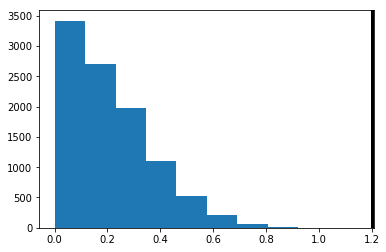

In [28]:
plt.hist(my_diffs)
plt.axvline(original_diff, color = 'k', linewidth = 5)
plt.show()

In [29]:
my_count = 0
for indv_diff in my_diffs:
    if indv_diff > original_diff:
        my_count += 1

In [30]:
my_count / len(my_diffs)

0.0

Compare versus results from t-test

In [31]:
from scipy.stats import ttest_ind

In [34]:
ttest_ind(df[df['results'] == 1]['age'], df[df['results'] == 0]['age'])

Ttest_indResult(statistic=-4.120671098427173, pvalue=3.813610788898163e-05)

Both are statistically significant.  We can reject the null hypothesis and say the average age of someone that voted for basic income is different than someone that voted against basic income. 